In [153]:
import os
import glob
import pandas as pd
import numpy as np
import math
import wbj
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
sns.set_style('ticks')

In [154]:
# Global toggle to save / not-save figures
isSaveFigures = True

# adjust some font params
plt.rcParams.update({'font.size': 14})
plt.rc('legend',fontsize='12')
plt.rcParams['figure.figsize'] = [10, 8]

In [155]:
inPATH = 'DIR_cov_distr/'
temp = [x for x in os.listdir(inPATH)]
inds = [x for x in os.listdir(inPATH) if not x.endswith(".txt")]

In [156]:
files = [pd.read_csv(x, delimiter='\t', names =['Read depth', 'Density']) for x in glob.glob(os.path.join(inPATH ,"*")) if not x.endswith(".txt")]
# Concatenate the list of DataFrames into one
df = pd.concat(files, axis=1)
df = df.fillna('0.0') # replace nans with 0
df = df.drop(columns=['Read depth']) # get rid of read depth column
df.columns = inds # rename headers
df.index.names = ['Read depth']
df = df.apply(pd.to_numeric, errors='coerce') # chnage datatype to numeric for plotting
df

,sf12,brn001,UstIshim,cta016,brn008,irk078,ans008,sbj001,ans014,brn002,irk00x,sf9,ajv58,brn003,kotias,ans017
Read depth,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
1,2437735.0,16477911.0,5482598.0,27852385.0,60323747.0,95820476.0,9858868.0,19117184.0,11254165.0,27923792.0,34498509.0,24985205.0,16864363.0,55015542,19615813.0,1046020.0
2,1772904.0,19738459.0,4831114.0,181548970.0,450133450.0,70046517.0,181064218.0,122361536.0,221948154.0,72729714.0,334708784.0,102040879.0,234511810.0,271196722,25518746.0,53595610.0
3,1523511.0,1961027.0,4713366.0,271468119.0,410254191.0,22403814.0,300230207.0,31176737.0,365986062.0,11713765.0,183397552.0,71702414.0,369829130.0,370622218,33229841.0,99497805.0
4,1374648.0,259243.0,4888348.0,321004030.0,286054299.0,4494709.0,198425312.0,7618046.0,316428364.0,1189642.0,88802819.0,20410320.0,293360809.0,385200336,43556661.0,154186075.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.0,0.0
269,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0


## Plotting results

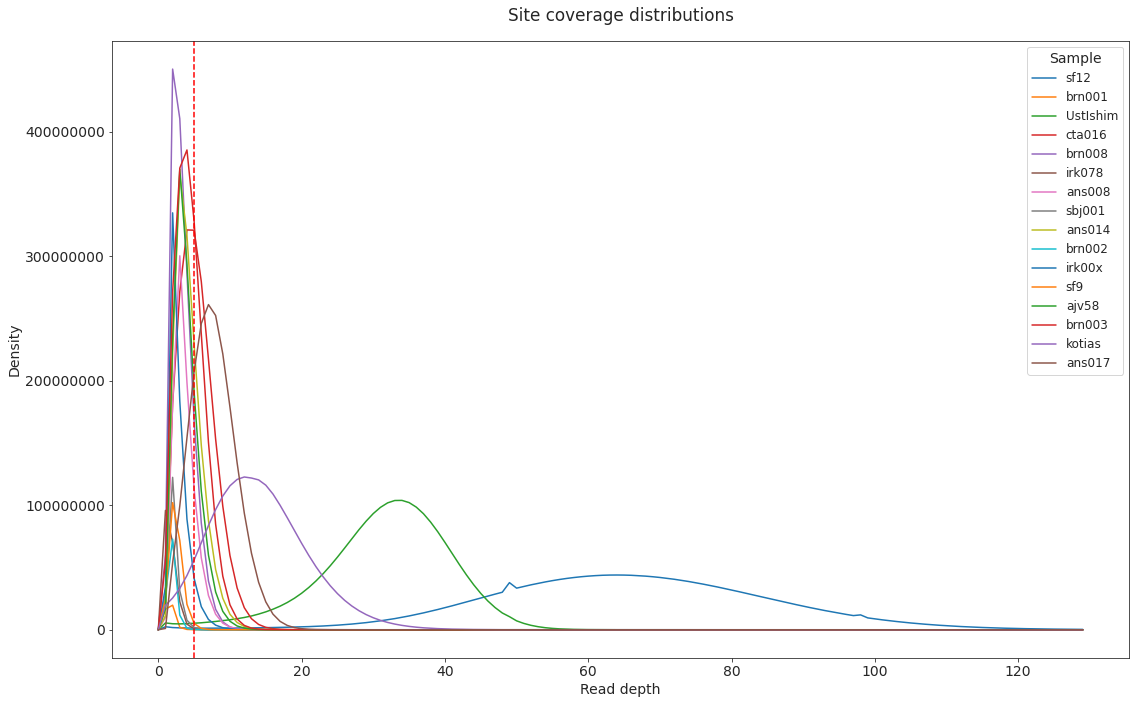

In [157]:
# Plot data
#fig,ax = plt.subplots(1,1,figsize=(10,10))
ax = df.iloc[0:130].plot.line(figsize=(16,10))
ax.ticklabel_format(style='plain', axis='y')
ax.axvline(5, color="red", linestyle="--")
ax.set_ylabel('Density')
ax.set_title('Site coverage distributions', pad=20)
ax.legend(title='Sample')
plt.tight_layout()
if isSaveFigures:
    plt.savefig('DIR_plots/cov_dist_plot.pdf')